## Data Preprocessing

In [1]:
##import packages here
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer

# We'll use this later
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Nasdaq Composite Index since 1971

In [2]:
##import prices from NASDAQ-all-time-daily.csv
##has data since 2/5/71
nasdaq_df = pd.read_csv('data/NASDAQ-all-time-daily.csv')
# nasdaq_df = pd.read_csv('NASDAQ-all-time-daily.csv',parse_dates = True, index_col = 0)
## index_col = 0 removes the first colum of indexs 0,1,2.... otherwise the plot below 
## will not appear as years 
##drop NaN rows
nasdaq_df.dropna()
##no need to drop more rows

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
12670,2021-05-03,14031.769531,14042.120117,13881.509766,13895.120117,13895.120117,4718850000
12671,2021-05-04,13774.509766,13795.570313,13485.589844,13633.500000,13633.500000,5852850000
12672,2021-05-05,13731.129883,13753.049805,13553.929688,13582.419922,13582.419922,4517100000
12673,2021-05-06,13557.830078,13635.730469,13439.389648,13632.839844,13632.839844,5000710000


## Facebook Prophet

In [3]:
# Defining proper training and test data sets
train_size = int(nasdaq_df.shape[0]*0.85)
train_df = nasdaq_df.iloc[:train_size]
test_df = nasdaq_df.iloc[train_size+1:]

In [4]:
# Building model using fbprophet
import fbprophet as prophet
# reset index to get date_time as a column
prophet_df = nasdaq_df[['Date','Adj Close']]

# prepare the required dataframe
prophet_df.rename(columns={'Date':'ds','Adj Close':'y'},inplace=True)
prophet_df.ds = pd.to_datetime(prophet_df.ds)

prophet_df = prophet_df[['ds','y']]

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
# Prophet model
pro_model = prophet.Prophet()
pro_model.fit(prophet_df)
#Create future dataframe
test_dates = pro_model.make_future_dataframe(periods=test_df.shape[0])
#Forecast the data using the model
forecast_df = pro_model.predict(test_dates)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


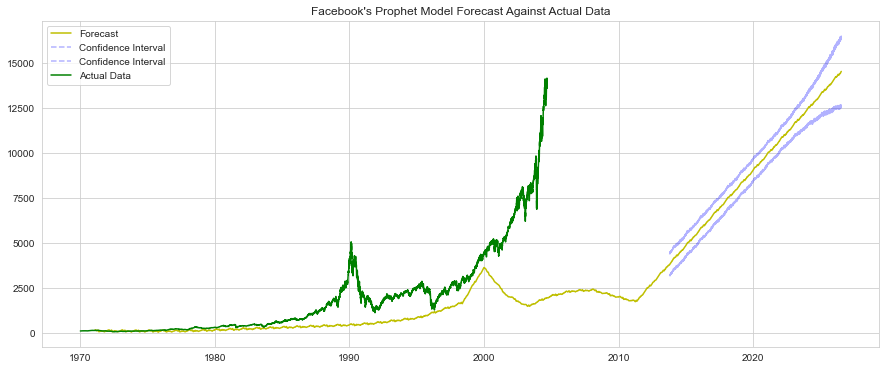

In [6]:
# Plot the forecasted data and current data  
forecast_df['datetime'] = forecast_df['ds']
forecast_df.set_index('datetime', inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
# plot against true data
plt.plot(forecast_df.yhat,c='y',label='Forecast')
plt.plot(forecast_df.yhat_lower.iloc[train_size+1:], 
         linestyle='--',
         c='b',
         alpha=0.3,
         label='Confidence Interval')
plt.plot(forecast_df.yhat_upper.iloc[train_size+1:],
         linestyle='--',
         c='b',
         alpha=0.3,
label='Confidence Interval')
plt.plot(prophet_df.y,c='g',label='Actual Data')
#nasplot = pd.read_csv('data/NASDAQ-all-time-daily.csv', parse_dates = True, index_col = 0)
#nasplot['Adj Close'].plot(c = 'g', label='Actual Data')
plt.legend()
plt.title('Facebook\'s Prophet Model Forecast Against Actual Data')
plt.show()

#### Hao: A stupid way the fix this abnormal plot (the Actual Data terminate around the year 2009!) is to comment the line "plt.plot(prophet_df.y,c='g',label='Actual Data')" above "#nasplot" and uncomment "#nasplot" . But why does the original code give the abnormal plot above ??